In [1]:
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
%matplotlib inline

In [2]:
mov = pd.read_csv('Movie_Id_Titles')

In [3]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [4]:
mov.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
us = pd.read_csv('u.data',sep='\t',names=['User_ID','item_id','Rating','Timestamp'])

In [6]:
us.head()

,User_ID,item_id,Rating,Timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
df = pd.merge(mov,us,on='item_id')

In [8]:
df.head()

,item_id,title,User_ID,Rating,Timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
item_id      100003 non-null int64
title        100003 non-null object
User_ID      100003 non-null int64
Rating       100003 non-null int64
Timestamp    100003 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [10]:
(df.groupby('title')['Rating'].mean()).sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [11]:
df[df['title']=='Marlene Dietrich: Shadow and Light (1996) ']

,item_id,title,User_ID,Rating,Timestamp
97212,1201,Marlene Dietrich: Shadow and Light (1996),90,5,891383687


In [12]:
(df.groupby('title')['Rating'].count()).sort_values(ascending=False)

title
Star Wars (1977)                                     584
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [13]:
df[df['title']=='Star Wars (1977)'].mean()

item_id      5.000000e+01
User_ID      4.705771e+02
Rating       4.359589e+00
Timestamp    8.830231e+08
dtype: float64

In [14]:
ratings = pd.DataFrame(df.groupby('title')['Rating'].mean())

In [15]:
ratings.head()

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['Number_Of_Ratings']=pd.Series((df.groupby('title')['Rating'].count()))

In [17]:
ratings.head()

,Rating,Number_Of_Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


(array([  1.12500000e+03,   2.53000000e+02,   1.36000000e+02,
          6.90000000e+01,   3.70000000e+01,   2.40000000e+01,
          8.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   59.3,  117.6,  175.9,  234.2,  292.5,  350.8,  409.1,
         467.4,  525.7,  584. ]),
 <a list of 10 Patch objects>)

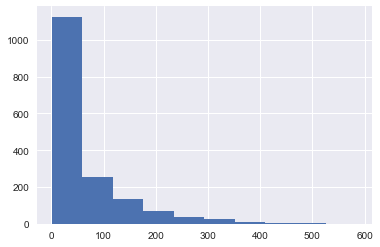

In [18]:
plt.hist(ratings['Number_Of_Ratings'])

(array([  76.,   30.,  103.,  178.,  233.,  417.,  333.,  240.,   43.,   11.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

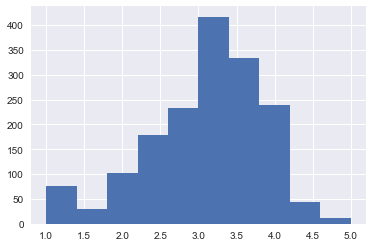

In [19]:
plt.hist(ratings['Rating'])

In [20]:
moviemat = df.pivot_table(index='User_ID',columns='title',values='Rating')

In [21]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings['Number_Of_Ratings'].sort_values(ascending=False)

title
Star Wars (1977)                                     584
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [23]:
swur = moviemat['Star Wars (1977)']
sur = moviemat['Scream (1996)']

In [24]:
sw_sim = moviemat.corrwith(swur)
s_sim = moviemat.corrwith(sur)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [25]:
sw_sim.head(10)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [26]:
sw_df = pd.DataFrame(sw_sim,columns=['Correaltion'])

In [27]:
sw_df.head(10)

,Correaltion
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [28]:
sw_df.dropna(inplace=True)

In [29]:
s_df = pd.DataFrame(s_sim,columns=['Correlation'])

In [30]:
s_df.head(10)

,Correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836
2 Days in the Valley (1996),0.014552
"20,000 Leagues Under the Sea (1954)",0.261985
2001: A Space Odyssey (1968),0.064604
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [31]:
s_df.dropna(inplace=True)

In [32]:
sw_df = sw_df.join(ratings['Number_Of_Ratings'])

In [33]:
sw_df.head()

,Correaltion,Number_Of_Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [34]:
sw_df['Number_Of_Ratings'].loc[sw_df['Correaltion'].sort_values(ascending=False).index]

title
No Escape (1994)                                                                       5
Man of the Year (1995)                                                                 9
Hollow Reed (1996)                                                                     6
Commandments (1997)                                                                    3
Cosi (1996)                                                                            4
Stripes (1981)                                                                         5
Golden Earrings (1947)                                                                 2
Mondo (1996)                                                                           3
Line King: Al Hirschfeld, The (1996)                                                   2
Outlaw, The (1943)                                                                     2
Hurricane Streets (1998)                                                               9
Scarlet Letter,

In [35]:
[sw_df['Number_Of_Ratings'].loc[sw_df['Correaltion'].sort_values(ascending=False).index]>125]

[title
 No Escape (1994)                                                                     False
 Man of the Year (1995)                                                               False
 Hollow Reed (1996)                                                                   False
 Commandments (1997)                                                                  False
 Cosi (1996)                                                                          False
 Stripes (1981)                                                                       False
 Golden Earrings (1947)                                                               False
 Mondo (1996)                                                                         False
 Line King: Al Hirschfeld, The (1996)                                                 False
 Outlaw, The (1943)                                                                   False
 Hurricane Streets (1998)                                                

In [36]:
sw_df[sw_df['Number_Of_Ratings']>125]['Correaltion'].sort_values(ascending=False).head()

title
Star Wars (1977)                   1.000000
Empire Strikes Back, The (1980)    0.748353
Return of the Jedi (1983)          0.672556
Raiders of the Lost Ark (1981)     0.536117
Sting, The (1973)                  0.367538
Name: Correaltion, dtype: float64

In [37]:
# Scream Movie
s_df = s_df.join(ratings['Number_Of_Ratings'])

In [38]:
s_df.head()

,Correlation,Number_Of_Ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [39]:
s_df['Number_Of_Ratings'].loc[s_df['Correlation'].sort_values(ascending=False).index]

title
Infinity (1996)                                                                   6
Scream (1996)                                                                   478
Time Tracers (1995)                                                               2
8 Seconds (1994)                                                                  4
Caro Diario (Dear Diary) (1994)                                                   4
Turbo: A Power Rangers Movie (1997)                                               5
Love and Death on Long Island (1997)                                              2
Maya Lin: A Strong Clear Vision (1994)                                            4
Calendar Girl (1993)                                                              3
Buddy (1997)                                                                      4
Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)                            3
Scarlet Letter, The (1926)                                            

In [40]:
[s_df['Number_Of_Ratings'].loc[s_df['Correlation'].sort_values(ascending=False).index]>125]

[title
 Infinity (1996)                                                                 False
 Scream (1996)                                                                    True
 Time Tracers (1995)                                                             False
 8 Seconds (1994)                                                                False
 Caro Diario (Dear Diary) (1994)                                                 False
 Turbo: A Power Rangers Movie (1997)                                             False
 Love and Death on Long Island (1997)                                            False
 Maya Lin: A Strong Clear Vision (1994)                                          False
 Calendar Girl (1993)                                                            False
 Buddy (1997)                                                                    False
 Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)                          False
 Scarlet Letter, The (1926)         

In [41]:
s_df[s_df['Number_Of_Ratings']>125]['Correlation'].sort_values(ascending=False).head()

title
Scream (1996)               1.000000
Seven (Se7en) (1995)        0.435188
Starship Troopers (1997)    0.419322
Cape Fear (1991)            0.397245
Jaws (1975)                 0.370752
Name: Correlation, dtype: float64